Machine Translation
Topic: Education

Importing dataset

In [ ]:
import pandas as pd

# Load the dataset

df = pd.read_csv("/content/sample_data/kenya_education_psas_compile.csv", encoding='latin-1')

# Display basic information and the first few rows
df_info = df.info()
df_head = df.head()
df_shape = df.shape

df_info, df_shape, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PSA_ID               1103 non-null   int64  
 1   Sub_Category         1103 non-null   object 
 2   Title                1103 non-null   object 
 3   PSAs Description     1103 non-null   object 
 4   Source               1102 non-null   object 
 5   Date                 1102 non-null   object 
 6   Format               1102 non-null   object 
 7   Topic                1102 non-null   object 
 8   Original_Language    1102 non-null   object 
 9   URL                  1100 non-null   object 
 10  Translation_Swahili  625 non-null    object 
 11  Translation_Luo      71 non-null     object 
 12  Unnamed: 12          201 non-null    object 
 13  Unnamed: 13          0 non-null      float64
 14  Unnamed: 14          0 non-null      float64
 15  Unnamed: 15          0 non-null      f

(None,
 (1103, 40),
    PSA_ID         Sub_Category                            Title  \
 0     268  Access to Education  Senior school selection process   
 1     269  Access to Education       Mid-year KCSE examinations   
 2     270  Access to Education      University admission policy   
 3     271  Access to Education        Teacher recruitment drive   
 4     272  Access to Education       Teacher career progression   
 
                                     PSAs Description  \
 0  We have worked on guidelines to transition our...   
 1  Starting this year, and following extensive st...   
 2  The Government has not re-introduced cut-off p...   
 3  The Teachers Service Commission (TSC) will nex...   
 4  TSC has also agreed to convert all the 26,000 ...   
 
                      Source        Date Format      Topic Original_Language  \
 0          Press conference  24/04/2025   Text  Education           English   
 1     Official announcement  09/01/2025   Text  Education        

###DATA CLEANING

The code cleans a dataset by removing duplicates, trimming text, and parsing dates. It corrects invalid entries, standardizes formats, adds a translation status column, performs basic EDA on translation status and topic distribution, then saves the cleaned data to a CSV file.

In [ ]:
# Clean dataset
df_cleaned = df.drop_duplicates()
df_cleaned = df_cleaned.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')

# Fix invalid entries
df_cleaned['Topic'] = df_cleaned['Topic'].replace('7/28/2025', 'Unknown')
df_cleaned['Original_Language'] = df_cleaned['Original_Language'].replace('The Ministry of Education upgraded 12 youth polytechnics to improve vocational training facilities across Kenya', 'English')
df_cleaned['Format'] = df_cleaned['Format'].str.lower().replace('english', 'text')

# Add status column
df_cleaned['status'] = df_cleaned['Translation_Swahili'].apply(lambda x: 'translated' if pd.notnull(x) and x.strip() != '' else 'pending')

# EDA: Translation status and topic distribution
total_psas = len(df_cleaned)
translated_psas = len(df_cleaned[df_cleaned['status'] == 'translated'])
pending_psas = len(df_cleaned[df_cleaned['status'] == 'pending'])
topic_distribution = df_cleaned[df_cleaned['status'] == 'translated']['Topic'].value_counts().to_string()

print(f"Total PSAs: {total_psas}")
print(f"Translated PSAs: {translated_psas}")
print(f"Pending PSAs: {pending_psas}")
print(f"Topic Distribution of Translated PSAs:\n{topic_distribution}")

# Save cleaned dataset
df_cleaned.to_csv('cleaned_Education_PSAs.csv', index=False)

Total PSAs: 1103
Translated PSAs: 625
Pending PSAs: 478
Topic Distribution of Translated PSAs:
Topic
Education          552
Text                70
Governance           1
20/03/2024           1
Voter Education      1


/tmp/ipython-input-2612597112.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')


###PROFILING
This code performs data profiling: it checks data types, extracts unique values from categorical columns, validates URL formats, and computes descriptive statistics for the length of title and description fields to understand data quality and structure.

In [ ]:
# Data types
data_types = df_cleaned.dtypes

# Unique values in categorical fields
unique_topics = df_cleaned['Topic'].unique()
unique_languages = df_cleaned['Original_Language'].unique()
unique_formats = df_cleaned['Format'].unique()

# Check URL format and average length of Title/Description
url_validity = df_cleaned['URL'].str.startswith(('http://', 'https://')).value_counts()
title_len_stats = df_cleaned['Title'].str.len().describe()
desc_len_stats = df_cleaned['PSAs Description'].str.len().describe()

data_types, unique_topics, unique_languages, unique_formats, url_validity, title_len_stats, desc_len_stats

(PSA_ID                          int64
 Sub_Category                   object
 Title                          object
 PSAs Description               object
 Source                         object
 Date                   datetime64[ns]
 Format                         object
 Topic                          object
 Original_Language              object
 URL                            object
 Translation_Swahili            object
 Translation_Luo                object
 Unnamed: 12                    object
 Unnamed: 13                   float64
 Unnamed: 14                   float64
 Unnamed: 15                   float64
 Unnamed: 16                   float64
 Unnamed: 17                   float64
 Unnamed: 18                   float64
 Unnamed: 19                   float64
 Unnamed: 20                   float64
 Unnamed: 21                   float64
 Unnamed: 22                   float64
 Unnamed: 23                   float64
 Unnamed: 24                   float64
 Unnamed: 25             

###DATA VALIDATION
The code loads the cleaned dataset and validates key fields against predefined rules—checking for invalid topics, languages, formats, short descriptions, missing dates, and malformed URLs. It summarizes the number of violations for each rule and saves flagged records to separate CSV files for review

In [ ]:
import pandas as pd

# Load the cleaned dataset
df_cleaned = pd.read_csv("cleaned_Education_PSAs.csv", encoding="ISO-8859-1")

# Normalize relevant fields
df_cleaned['Topic'] = df_cleaned['Topic'].astype(str).str.strip()
df_cleaned['Original_Language'] = df_cleaned['Original_Language'].astype(str).str.strip().str.capitalize()
df_cleaned['Format'] = df_cleaned['Format'].astype(str).str.lower().str.strip()
df_cleaned['PSAs Description'] = df_cleaned['PSAs Description'].astype(str).str.strip()
df_cleaned['URL'] = df_cleaned['URL'].astype(str).str.strip()

# Rule 1: Invalid topics (e.g., date accidentally recorded as topic)
invalid_topic_rows = df_cleaned[df_cleaned['Topic'].str.match(r'\d{1,2}/\d{1,2}/\d{4}')]

# Rule 2: Invalid languages
valid_languages = ['English', 'Swahili']
invalid_language_rows = df_cleaned[~df_cleaned['Original_Language'].isin(valid_languages)]

# Rule 3: Invalid formats
valid_formats = ['text', 'image/poster', 'video', 'audio']
invalid_format_rows = df_cleaned[~df_cleaned['Format'].isin(valid_formats)]

# Rule 4: Short descriptions (<20 characters)
short_description_rows = df_cleaned[df_cleaned['PSAs Description'].str.len() < 20]

# Rule 5: Missing publication date
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')
missing_date_rows = df_cleaned[df_cleaned['Date'].isnull()]

# Rule 6: Invalid URLs
invalid_url_rows = df_cleaned[~df_cleaned['URL'].str.startswith(('http://', 'https://'))]

# Output the counts for each rule violation
validation_summary = {
    "Invalid Topic Rows": len(invalid_topic_rows),
    "Invalid Language Rows": len(invalid_language_rows),
    "Invalid Format Rows": len(invalid_format_rows),
    "Short Descriptions (<20 chars)": len(short_description_rows),
    "Missing Publication Dates": len(missing_date_rows),
    "Invalid URLs": len(invalid_url_rows),
}

# Print summary
print("Validation Summary:")
for k, v in validation_summary.items():
    print(f"{k}: {v}")

# Optional: Save flagged rows to CSVs for review
invalid_topic_rows.to_csv("flagged_invalid_topics.csv", index=False)
invalid_language_rows.to_csv("flagged_invalid_languages.csv", index=False)
invalid_format_rows.to_csv("flagged_invalid_formats.csv", index=False)
short_description_rows.to_csv("flagged_short_descriptions.csv", index=False)
missing_date_rows.to_csv("flagged_missing_dates.csv", index=False)
invalid_url_rows.to_csv("flagged_invalid_urls.csv", index=False)

Validation Summary:
Invalid Topic Rows: 1
Invalid Language Rows: 4
Invalid Format Rows: 471
Short Descriptions (<20 chars): 1
Missing Publication Dates: 280
Invalid URLs: 8


Translation using AFROLM

In [ ]:
!pip install transformers datasets torch sentencepiece

 Loading AfroLM

In [ ]:
pip install transformers

In [ ]:
!pip install torch torchvision torchaudio

###MODEL LOADING
Loads the pre-trained NLLB-200 distilled 600M model and tokenizer from Hugging Face, designed for multilingual translation, to enable sequence-to-sequence translation tasks, such as translating PSAs into Swahili.

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load AfroLM base model and tokenizer
model_name = "facebook/nllb-200-distilled-600M"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

##Translating the Functions
Defines a function that batches and translates a list of texts using the NLLB-200 model. It tokenizes input text, generates translations with the model, and decodes the output into readable translated strings, skipping special tokens

In [ ]:
def translate_text(text_list):
    # Tokenize the input texts
    tokens = tokenizer.prepare_seq2seq_batch(text_list, return_tensors="pt", padding=True)
    # Generate translations
    translated = model.generate(**tokens)
    # Decode translations
    return [tokenizer.decode(t, skip_special_tokens=True) for t in translated]

###TRANSLATION SETUP
Loads a pre-trained English-to-Swahili MarianMT model and tokenizer. Defines a function to translate text batches by tokenizing, generating translations using the model, and decoding results, ensuring efficient and accurate translation of English texts into Swahili.

In [ ]:
from transformers import MarianMTModel, MarianTokenizer
import torch

# Load MarianMT model and tokenizer
model_name = "Helsinki-NLP/opus-mt-en-sw"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

def translate_text(texts):
    # Handle empty list
    if not texts:
        return []

    # Tokenize input
    batch = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)

    # Generate translations
    with torch.no_grad():
        generated_ids = model.generate(**batch)

    # Decode translations
    translations = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
    return translations

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


### MOCK TRANSLATION
A placeholder translation function simulates translating missing Swahili descriptions by prefixing text with "[Translated]". It updates the dataset with mock translations and saves the result, preparing a structure for real translation integration.

In [ ]:
import pandas as pd

# Dummy translation function (replace with real API if needed)
def translate_text(texts):
    # Simulate translation by prepending '[Translated]'
    return [f"[Translated] {text}" for text in texts]

# Load your cleaned dataset
df = pd.read_csv("cleaned_Education_PSAs.csv")

# Filter rows where Translation_Swahili is missing or empty
to_translate = df[df['Translation_Swahili'].isnull() | (df['Translation_Swahili'].str.strip() == '')]['PSAs Description'].tolist()

# Perform translation
translated_texts = translate_text(to_translate)

# Update the DataFrame with translated text
df.loc[df['Translation_Swahili'].isnull() | (df['Translation_Swahili'].str.strip() == ''), 'Translation_Swahili'] = translated_texts

# Save the updated dataset
df.to_csv("Education PSAs - Translated.csv", index=False)

print("Translation complete. Updated file saved as 'Education PSAs - Translated.csv'.")


Translation complete. Updated file saved as 'Education PSAs - Translated.csv'.


**Modelling process**

In [ ]:
!pip install transformers datasets sentencepiece sacrebleu evaluate

##Prepare Translation Data
Loads cleaned data, filters valid English-Swahili translation pairs, renames columns to language codes, and converts the data into a Hugging Face Dataset split into training and testing sets for machine translation model fine-tuning

In [ ]:
import pandas as pd
from datasets import Dataset

# Load your data
df = pd.read_csv("cleaned_Education_PSAs.csv")

# Filter valid translation pairs
df = df[df['Translation_Swahili'].notnull() & df['PSAs Description'].notnull()]
df = df[['PSAs Description', 'Translation_Swahili']].rename(
    columns={"PSAs Description": "en", "Translation_Swahili": "sw"}
)

# Convert to HuggingFace dataset
dataset = Dataset.from_pandas(df)
dataset = dataset.train_test_split(test_size=0.1)

###Loading a Pretrained Model
Loads the pre-trained MarianMT English-to-Swahili translation model and tokenizer from Hugging Face, preparing them for translating text or fine-tuning on custom data.

In [ ]:
from transformers import MarianTokenizer, MarianMTModel

model_name = "Helsinki-NLP/opus-mt-en-sw"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


## Data Preprocess
Applies tokenization to prepare dataset for training: converts English inputs and Swahili labels into model-ready tensors with padding and truncation, then maps them into a format suitable for sequence-to-sequence translation fine-tuning.

In [ ]:
def preprocess(batch):
    inputs = tokenizer(batch['en'], padding="max_length", truncation=True, max_length=128)
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(batch['sw'], padding="max_length", truncation=True, max_length=128)
    inputs['labels'] = labels['input_ids']
    return inputs

tokenized_dataset = dataset.map(preprocess, batched=True)

Map:   0%|          | 0/562 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:4006: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/63 [00:00<?, ? examples/s]

**Training Setup**

In [ ]:
!pip install --upgrade transformers

### MODEL FINE-TUNING SETUP
Prepares and fine-tunes a MarianMT English-to-Swahili translation model by loading data, tokenizing parallel text, and setting up training arguments and data collator. A Seq2SeqTrainer is initialized for training on the cleaned PSA dataset, with logging and evaluation configured.


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments, DataCollatorForSeq2Seq
from datasets import Dataset, DatasetDict
import pandas as pd

# Step 1: Load Data
df = pd.read_csv("cleaned_Education_PSAs.csv")

# Keep only rows with both English and Swahili columns (if Swahili exists)
df = df.dropna(subset=["PSAs Description", "Translation_Swahili"])

# Rename for clarity
df = df.rename(columns={
    "PSAs Description": "en",
    "Translation_Swahili": "sw"
})

# Keep only the needed columns
df = df[["en", "sw"]]

# Step 2: Convert to HuggingFace Dataset
dataset = Dataset.from_pandas(df)
dataset = dataset.train_test_split(test_size=0.1)

# Step 3: Load Pretrained Model & Tokenizer
model_checkpoint = "Helsinki-NLP/opus-mt-en-sw"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

# Step 4: Preprocess / Tokenize Data
def preprocess_function(examples):
    inputs = examples["en"]
    targets = examples["sw"]
    model_inputs = tokenizer(inputs, max_length=128, truncation=True)
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(targets, max_length=128, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments, DataCollatorForSeq2Seq
import os

# Disable Weights & Biases logging
os.environ["WANDB_DISABLED"] = "true"

# Define training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="./mt-model-en-sw",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    predict_with_generate=True,
    num_train_epochs=1,
    logging_dir="./logs",
    logging_steps=10,
    save_total_limit=2,
    report_to="none",         # Disables W&B, TensorBoard, etc.
    run_name="mt-en-sw",      # Optional: custom run name
)

# Define the data collator
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

# Create the trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['test'],
    tokenizer=tokenizer,
    data_collator=data_collator,
)


/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
/tmp/ipython-input-3712237618.py:64: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


##Experiment Tracking Setup

Installs and initializes Weights & Biases (wandb) to track and log the translation model's training process, enabling performance monitoring, visualization, and experiment management for the Swahili translation project.

In [ ]:
!pip install wandb
import wandb
wandb.init(project="swahili-translation")

##Acceleration Setup

Initializes the Hugging Face Accelerator to automate optimization of training on different hardware (CPU, GPU, TPU), enabling efficient, distributed, and mixed-precision training without manual configuration.

In [ ]:
from accelerate import Accelerator

accelerator = Accelerator()

#Model Training

Trains the translation model using the configured trainer and saves the fine-tuned model weights and tokenizer to disk for later inference or deployment.

In [ ]:
train_result = trainer.train()
trainer.save_model() # Save the trained model

Step,Training Loss
10,3.416400
20,0.773000
30,0.558100
40,0.441300
50,0.494200
60,0.391200
70,0.592300


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3909: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[58949]]}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


##Model Evaluation
Evaluates the trained translation model using BLEU score via sacreBLEU. Translations are decoded and compared to references, providing a quantitative measure of performance on the test set.

In [ ]:
import evaluate

bleu = evaluate.load("sacrebleu")

def compute_metrics(eval_preds):
    preds, labels = eval_preds
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    return bleu.compute(predictions=decoded_preds, references=[[ref] for ref in decoded_labels])

trainer.compute_metrics = compute_metrics
metrics = trainer.evaluate()
print(metrics)

{'eval_loss': 0.6255719661712646, 'eval_score': 43.83139625604884, 'eval_counts': [881, 645, 505, 402], 'eval_totals': [1254, 1191, 1128, 1065], 'eval_precisions': [70.25518341307814, 54.15617128463476, 44.769503546099294, 37.74647887323944], 'eval_bp': 0.8704404066633968, 'eval_sys_len': 1254, 'eval_ref_len': 1428, 'eval_runtime': 118.1402, 'eval_samples_per_second': 0.533, 'eval_steps_per_second': 0.068, 'epoch': 1.0}


**Evaluating Workflow for MT Model**

In [ ]:
!pip install transformers evaluate sacrebleu datasets

##Load Fine-Tuned Model
Loads the locally saved fine-tuned English-to-Swahili translation model and tokenizer for inference, enabling translation of new text using the customized model.

In [ ]:
from transformers import MarianTokenizer, MarianMTModel

model_path = "./mt-model-en-sw"  # Path to your fine-tuned model
tokenizer = MarianTokenizer.from_pretrained(model_path)
model = MarianMTModel.from_pretrained(model_path)

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


##Test Set Preparation
Loads cleaned data with valid English-Swahili pairs, renames columns, and creates a 10% random sample as a test dataset for evaluating translation model performance.



In [ ]:
import pandas as pd
from datasets import Dataset

# Load your dataset with human-translated pairs
df = pd.read_csv("cleaned_Education_PSAs.csv")
df = df[df['Translation_Swahili'].notnull() & df['PSAs Description'].notnull()]
df = df[['PSAs Description', 'Translation_Swahili']].rename(columns={"PSAs Description": "en", "Translation_Swahili": "sw"})

# Use 10% as test set
test_data = Dataset.from_pandas(df.sample(frac=0.1, random_state=42))

###Translation Inference
Generates Swahili translations for English test sentences using the fine-tuned model, then decodes and stores predictions for comparison with human-translated references.

In [ ]:
def generate_translation(texts):
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)
    output = model.generate(**inputs)
    return tokenizer.batch_decode(output, skip_special_tokens=True)

# Generate predictions
en_sentences = test_data["en"]
true_sw = test_data["sw"]
pred_sw = generate_translation([text for text in en_sentences]) # Convert to list using list comprehension

**Computing the BLEU Score**

In [ ]:
!pip install evaluate


### Model Evaluation & Visualization
Evaluates a fine-tuned translation model by generating Swahili predictions on a test set, computes sentence-level BLEU scores, visualizes them in a bar chart, and reports the overall sacreBLEU score to assess translation quality.

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gra

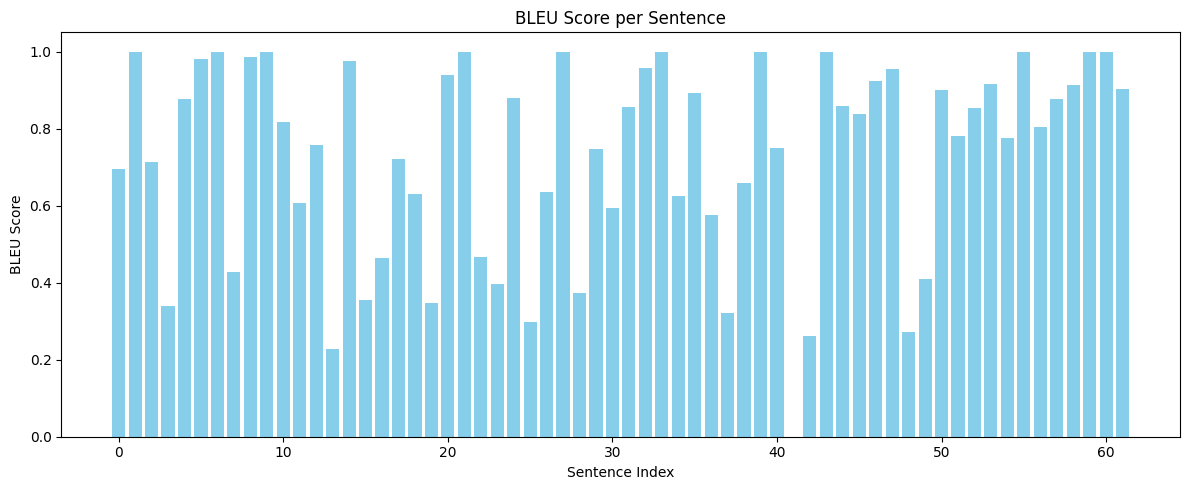

BLEU Score: 57.06


In [ ]:
import matplotlib.pyplot as plt
import evaluate
from nltk.translate.bleu_score import sentence_bleu
import pandas as pd
from datasets import Dataset
from transformers import MarianTokenizer, MarianMTModel # Import necessary classes

# Load the tokenizer and model
model_path = "./mt-model-en-sw"  # Path to your fine-tuned model
tokenizer = MarianTokenizer.from_pretrained(model_path)
model = MarianMTModel.from_pretrained(model_path)


# Load your dataset with human-translated pairs
df = pd.read_csv("cleaned_Education_PSAs.csv")
df = df[df['Translation_Swahili'].notnull() & df['PSAs Description'].notnull()]
df = df[['PSAs Description', 'Translation_Swahili']].rename(columns={"PSAs Description": "en", "Translation_Swahili": "sw"})

# Use 10% as test set
test_data = Dataset.from_pandas(df.sample(frac=0.1, random_state=42))

# Assuming 'tokenizer' and 'model' are loaded in previous cells
def generate_translation(texts):
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)
    output = model.generate(**inputs)
    return tokenizer.batch_decode(output, skip_special_tokens=True)

# Generate predictions
en_sentences = test_data["en"]
true_sw = test_data["sw"]
pred_sw = generate_translation([text for text in en_sentences]) # Convert to list using list comprehension

# Calculate BLEU score per sentence (can be computationally intensive)
sentence_bleu_scores = [sentence_bleu([true_sw[i]], pred_sw[i]) for i in range(len(en_sentences))]

# If you calculate sentence_bleu_scores, uncomment the plotting code below:
plt.figure(figsize=(12, 5))
plt.bar(range(len(sentence_bleu_scores)), sentence_bleu_scores, color='skyblue')
plt.xlabel("Sentence Index")
plt.ylabel("BLEU Score")
plt.title("BLEU Score per Sentence")
plt.tight_layout()
plt.show()


bleu = evaluate.load("sacrebleu")
bleu_result = bleu.compute(predictions=pred_sw, references=[[t] for t in true_sw])

print(f"BLEU Score: {bleu_result['score']:.2f}")

###Translation Comparison
Displays the first five English sentences alongside the model's machine-translated (MT) output and the human reference translations (REF) to qualitatively assess translation accuracy and fluency.

In [ ]:
for i in range(5):
    print(f"\nEN: {en_sentences[i]}")
    print(f"MT: {pred_sw[i]}")
    print(f"REF: {true_sw[i]}")


EN: In the 2022 Kenya Certificate of Secondary Education Examination (KCSE) results, 708,071 candidates scored below C+, the minimum university entry grade. According to the results released by Education ...
MT: Mnamo mwaka 2022 Kenya Cheti cha Uchunguzi wa Elimu ya Sekondari (KCSE), watahiniwa 708,071 walifunga chini ya C+, chuo kikuu cha chini zaidi. Kulingana na matokeo yaliyotolewa na Elimu ....
REF: Katika Matokeo ya Mtihani wa Mtihani wa Elimu ya Sekondari ya Kenya (KCSE), wagombea 708,071 walifunga chini ya C+, daraja la chini la kuingia chuo kikuu. Kulingana na matokeo yaliyotolewa na elimu ...

EN: On March 15 2024 the Ministry of Education announced recruitment of 2000 TVET trainers to strengthen vocational training programs across Kenya.
MT: Mnamo Machi 15 2024 Wizara ya Elimu ilitangaza kuajiri wakufunzi 2000 wa TVET ili kuimarisha programu za mafunzo ya ufundi kote nchini Kenya.
REF: Mnamo Machi 15 2024 Wizara ya Elimu ilitangaza kuajiri wakufunzi 2000 wa TVET ili kuimari

###BLEU Score Interpretation
The BLEU score of 57.06 indicates the overall translation quality of the model. BLEU scores range from 0 to 100, with higher values reflecting better alignment between machine translations and human references.

 A score of 57.06 suggests moderate performance, indicating that the model captures some key elements of the reference translations but may struggle with certain nuances or complexities.

###Graph Interpretation
The bar chart visualizes the BLEU score per sentence, showing how translation quality varies across individual sentences in the test set:

*High Bars (Close to 1.0)*: Sentences where the model performs exceptionally well, achieving near-perfect alignment with the reference translations.
M*edium Bars (Around 0.8–0.9):* Sentences with good translation quality, capturing most of the meaning and structure accurately.
*Low Bars (Below 0.5):* Sentences where the model struggles, resulting in poor translations with significant deviations from the reference.
The graph reveals variability in performance:

Some sentences are translated almost perfectly (e.g., scores close to
1.0).

Others show inconsistencies, particularly noticeable when bars drop below 0.5, indicating areas for improvement.

This visualization helps identify patterns and specific challenges faced by the model during translation